In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import logging
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv("../data/test_data.csv")

In [9]:
le = LabelEncoder()
categorical_columns = ["Department", "Severity of Illness", "Type of Admission", "Hospital_type_code", "Age", "Hospital_region_code", "Ward_Facility_Code", "Ward_Type"]

for column in categorical_columns:
    try:
        data[column] = le.fit_transform(data[column])
    except Exception as e:
        logging.error(f"Error occurred while label encoding {column}: {e}")

# Visualizations and Analysis of the Dataset

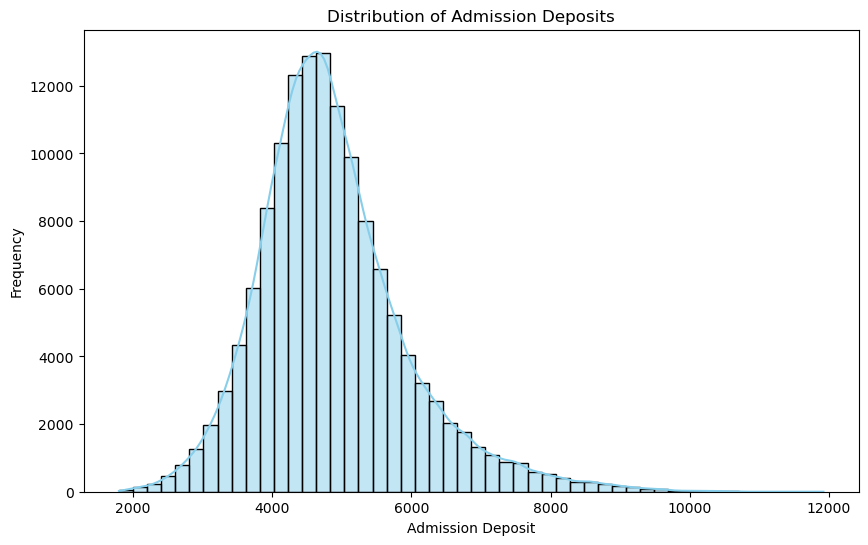

In [5]:
# Admission Deposit Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Admission_Deposit'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Admission Deposits')
plt.xlabel('Admission Deposit')
plt.ylabel('Frequency')
plt.show()

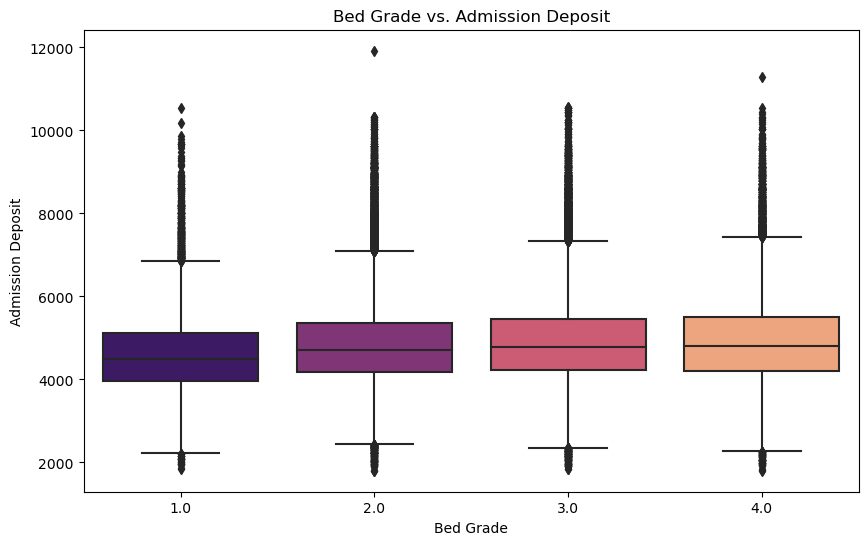

In [7]:
# Bed Grades vs. Admission Deposits
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bed Grade', y='Admission_Deposit', data=data, palette='magma')
plt.title('Bed Grade vs. Admission Deposit')
plt.xlabel('Bed Grade')
plt.ylabel('Admission Deposit')
plt.show()

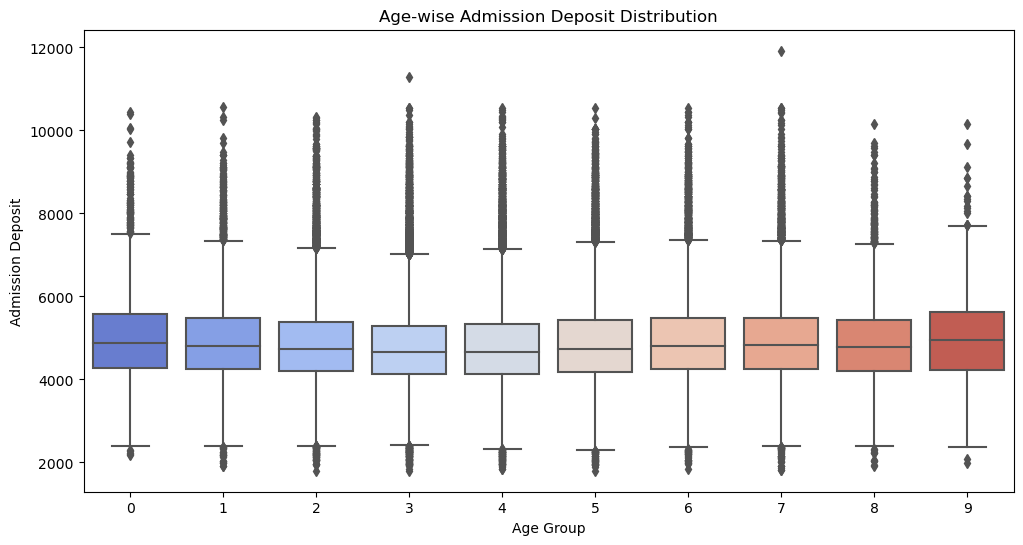

In [13]:
# Patient Age Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Admission_Deposit', data=data, palette='coolwarm')
plt.title('Age-wise Admission Deposit Distribution')
plt.xlabel('Age Group')
plt.ylabel('Admission Deposit')
plt.show()

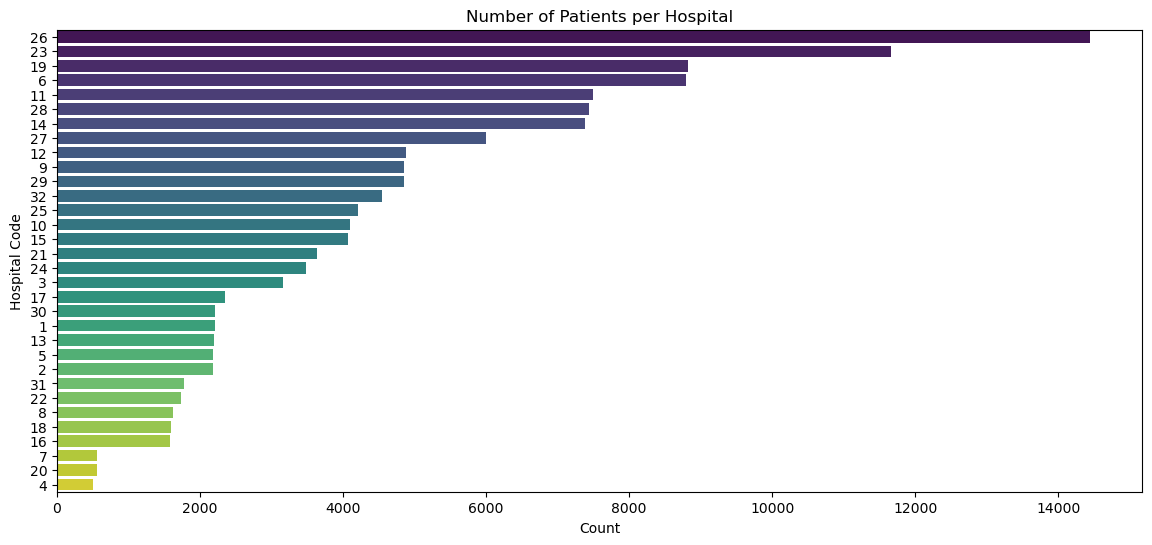

In [14]:
# Hospital-wise Patient Count
plt.figure(figsize=(14, 6))
sns.countplot(y=data['Hospital_code'], order=data['Hospital_code'].value_counts().index, palette='viridis')
plt.title('Number of Patients per Hospital')
plt.xlabel('Count')
plt.ylabel('Hospital Code')
plt.show()

In [10]:
fig = px.scatter(data, x='Hospital_code', y='Admission_Deposit', color='Severity of Illness', title='Hospital vs Admission Deposits', size_max=10)
fig.show()

In [11]:
fig2 = px.histogram(data, x='Visitors with Patient', color='Severity of Illness', title='Visitors with Patient Distribution')
fig2.show()